<a href="https://colab.research.google.com/github/murtazav/Pollution_Prediction-/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded=files.upload()

Saving bbdata.csv to bbdata.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('bbdata.csv')

In [0]:
data.head()

,ID,pm2_5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,0.0,12.0,-21.0,-3.0,1034.0,NW,249.85,0.0,0.0,31-12-2014 23:00
1,1.0,8.0,-22.0,-4.0,1034.0,NW,246.72,0.0,0.0,31-12-2014 22:00
2,2.0,10.0,-22.0,-3.0,1034.0,NW,242.70,0.0,0.0,31-12-2014 21:00
3,3.0,10.0,-22.0,-3.0,1034.0,NW,237.78,0.0,0.0,31-12-2014 20:00
4,4.0,8.0,-23.0,-2.0,1034.0,NW,231.97,0.0,0.0,31-12-2014 19:00


In [0]:
data['year'][43813]

2010

In [0]:
s=pd.Series()
ls=[]
for i in range(43814):
  ls.append(str(data['day'][i])+'-'+str(data['month'][i])+'-'+str(data['year'][i])+' '+str(data['hour'][i])+':00')
  

In [0]:
s=pd.Series(ls)

In [0]:
data['datetime']=s

In [0]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0,31-12-2014 23:00
1,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,31-12-2014 22:00
2,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,31-12-2014 21:00
3,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,31-12-2014 20:00
4,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,31-12-2014 19:00


In [0]:
y=data.iloc[:,5].values

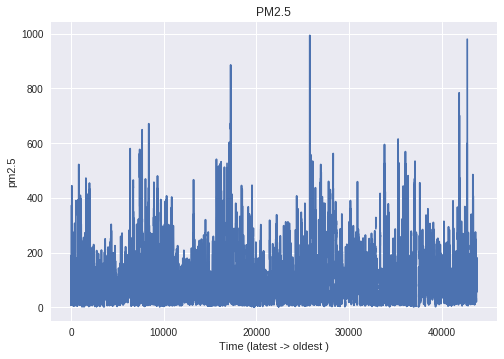

In [0]:
plt.plot(y)
plt.title("PM2.5")
plt.xlabel("Time (latest -> oldest )")
plt.ylabel("pm2.5")
plt.show()

In [0]:
train=data[0:35051]
test=data[35051:]

In [0]:
data.columns

Index(['ID', 'pm2_5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir',
       'datetime'],
      dtype='object')

In [0]:
train['datetime'] = pd.to_datetime(train.datetime, format = '%d-%m-%Y %H:%M')
test['datetime'] = pd.to_datetime(test.datetime, format = '%d-%m-%Y %H:%M')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
for i in (train, test):
    i['year'] = i.datetime.dt.year
    i['month'] = i.datetime.dt.month
    i['day']= i.datetime.dt.day
    i['Hour']=i.datetime.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
train['Day of week'] = train['datetime'].dt.dayofweek
temp = train['datetime']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['datetime'].apply(applyer)
train['weekend'] = temp2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


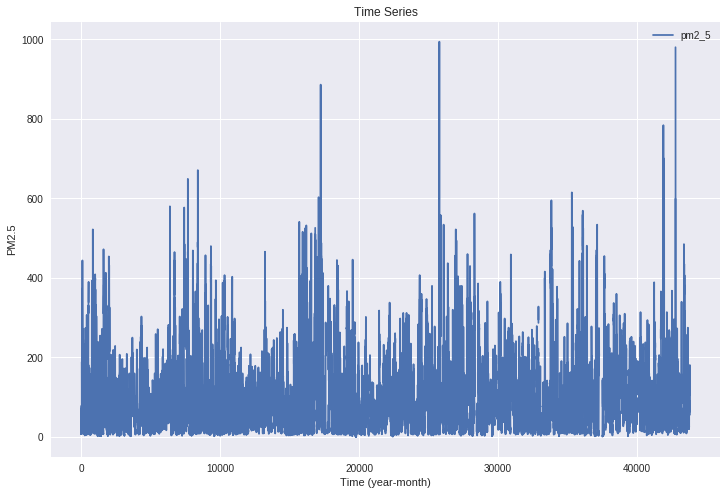

In [0]:
train.index = train['datetime']
df = train.drop('ID',1)
ts = data['pm2_5']
plt.figure(figsize = (12,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("PM2.5")
plt.legend(loc = 'best')

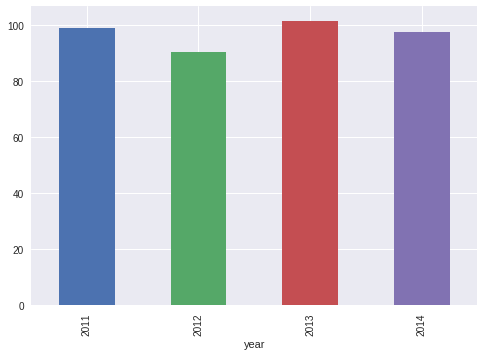

In [0]:
train.groupby('year')['pm2_5'].mean().plot.bar()

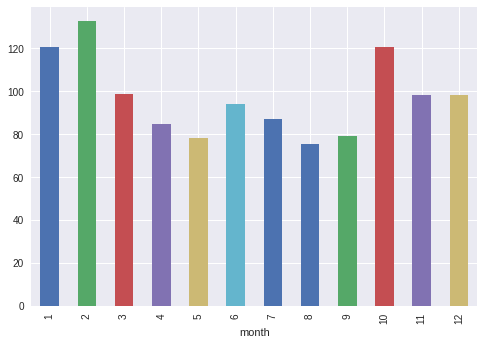

In [0]:
train.groupby('month')['pm2_5'].mean().plot.bar()

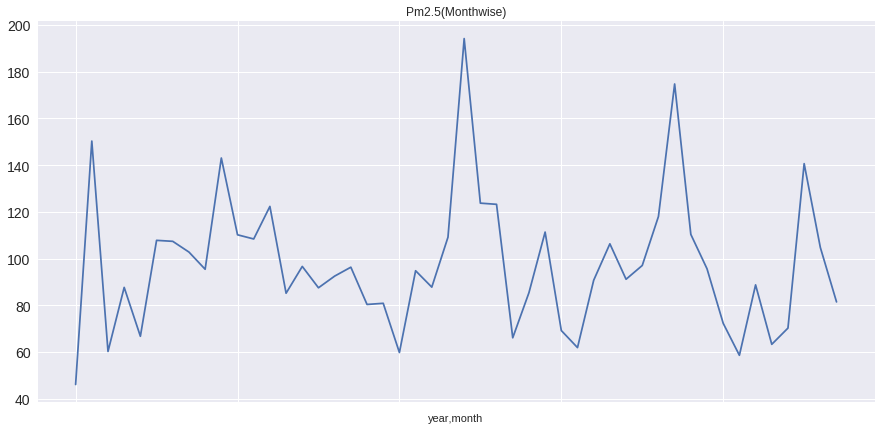

In [0]:
temp = train.groupby(['year', 'month'])['pm2_5'].mean()
temp.plot(figsize =(15,7), title = "Pm2.5(Monthwise)", fontsize = 14)

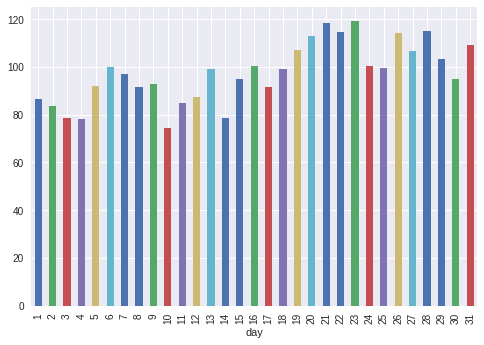

In [0]:
train.groupby('day') ['pm2_5'].mean().plot.bar()

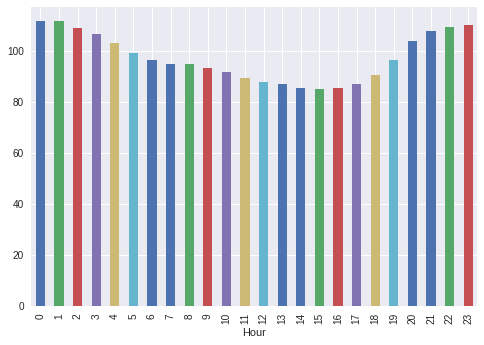

In [0]:
train.groupby('Hour')['pm2_5'].mean().plot.bar()

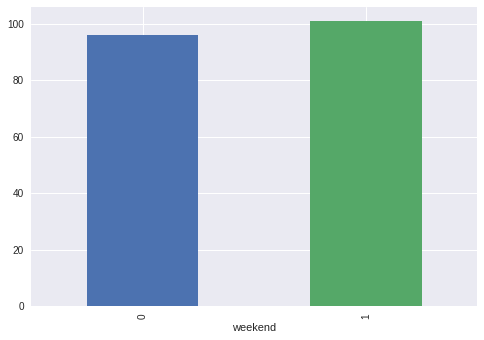

In [0]:
train.groupby('weekend') ['pm2_5'].mean().plot.bar()

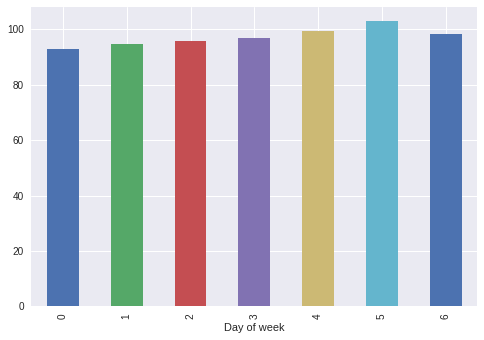

In [0]:
train.groupby('Day of week') ['pm2_5'].mean().plot.bar()

In [0]:
train.Timestamp = pd.to_datetime(train.datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


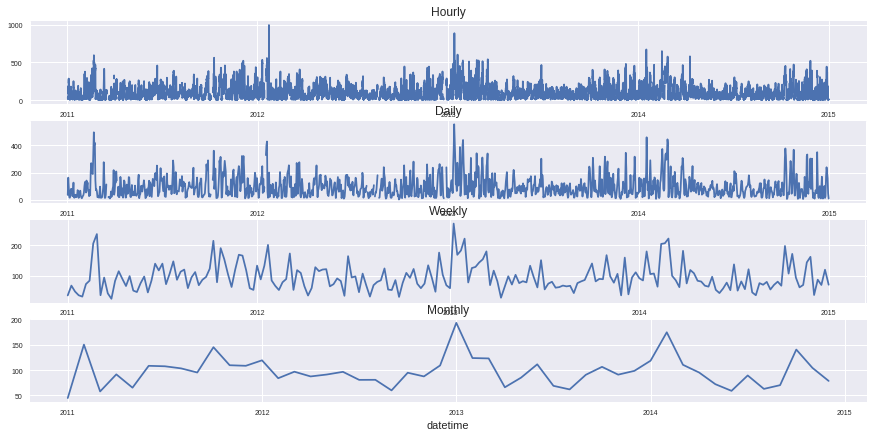

In [0]:
fig,axs = plt.subplots(4,1)

hourly.pm2_5.plot(figsize = (15,7), title = "Hourly", fontsize = 7, ax = axs[0])
daily.pm2_5.plot(figsize = (15,7), title = "Daily", fontsize = 7, ax = axs[1])
weekly.pm2_5.plot(figsize = (15,7), title = "Weekly", fontsize = 7, ax = axs[2])
monthly.pm2_5.plot(figsize = (15,7), title = "Monthly", fontsize = 7, ax = axs[3])

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
test.Timestamp = pd.to_datetime(test.datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
Train = train.ix['2011-01-02':'2014-09-04']
valid = train.ix['2014-09-05':'2014-12-31']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
Train

,ID,pm2_5,DEWP,TEMP,PRES,Iws,Is,Ir,year,month,day,Hour,Day of week,weekend
datetime,,,,,,,,,,,,,,
2011-01-02,35027.5,36.666667,-16.958333,-4.958333,1035.333333,9.327083,0.0,0.000000,2011.0,1.0,2.0,11.5,6.0,1.0
2011-01-03,35003.5,162.291667,-14.500000,-6.041667,1030.875000,1.503750,0.0,0.000000,2011.0,1.0,3.0,11.5,0.0,0.0
2011-01-04,34979.5,91.333333,-15.416667,-4.958333,1027.208333,15.812500,0.0,0.000000,2011.0,1.0,4.0,11.5,1.0,0.0
2011-01-05,34955.5,20.250000,-20.041667,-5.041667,1031.666667,177.675833,0.0,0.000000,2011.0,1.0,5.0,11.5,2.0,0.0
2011-01-06,34931.5,15.875000,-19.208333,-5.041667,1038.083333,357.267500,0.0,0.000000,2011.0,1.0,6.0,11.5,3.0,0.0
2011-01-07,34907.5,46.666667,-17.833333,-4.708333,1030.916667,82.285417,0.0,0.000000,2011.0,1.0,7.0,11.5,4.0,0.0
2011-01-08,34883.5,79.750000,-17.208333,-3.875000,1028.083333,62.039583,0.0,0.000000,2011.0,1.0,8.0,11.5,5.0,1.0
2011-01-09,34859.5,NaN,-22.375000,-5.625000,1036.791667,287.103750,0.0,0.000000,2011.0,1.0,9.0,11.5,6.0,1.0
2011-01-10,34835.5,80.125000,-20.833333,-4.500000,1028.083333,104.560000,0.0,0.000000,2011.0,1.0,10.0,11.5,0.0,0.0


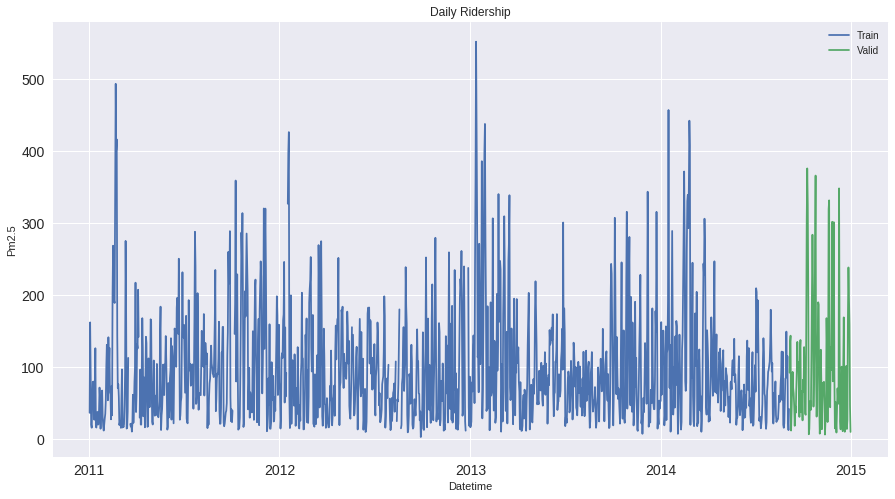

In [0]:
Train.pm2_5.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.pm2_5.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Pm2.5')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Naive Forecast')

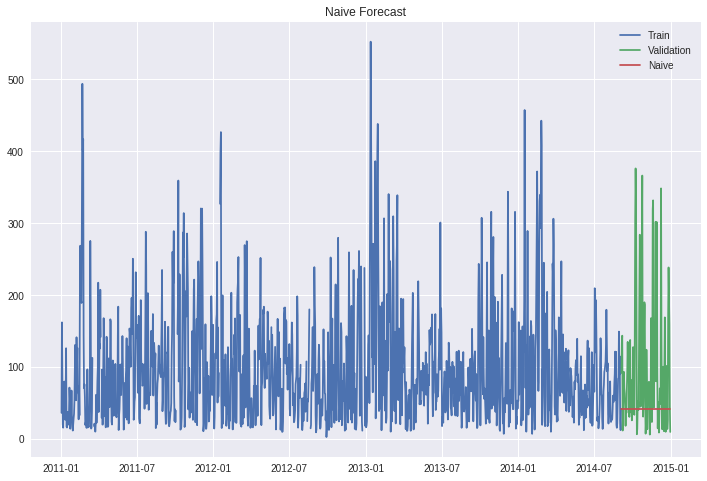

In [0]:
dd = np.asarray(Train.pm2_5)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['pm2_5'],label = 'Train')
plt.plot(valid.index, valid['pm2_5'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')